# Introduction to Forecasting
In the previous section we fit various smoothing models to existing data. The purpose behind this is to predict what happens next.<br>
What's our best guess for next month's value? For the next six months?

In this section we'll look to extend our models into the future. First we'll divide known data into training and testing sets, and evaluate the performance of a trained model on known test data.

* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

## Forecasting with the Holt-Winters Method
For this example we'll use the same airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv("D:/ML-Datasets/Udemy-TimeSeries/airline_passengers.csv", index_col='Month', parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
# Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Train Test Split

In [7]:
train_data = df.iloc[:108] # Goes upto but not including 108
test_data = df.iloc[108:]

## Fitting the model

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', 
                                    seasonal_periods=12).fit()

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


## Evaluating Model against Test set

In [9]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')
test_predictions

1958-01-01    356.739103
1958-02-01    343.561185
1958-03-01    403.996734
1958-04-01    397.853455
1958-05-01    406.415824
1958-06-01    479.824244
1958-07-01    529.820219
1958-08-01    524.771866
1958-09-01    454.714763
1958-10-01    391.965311
1958-11-01    345.259523
1958-12-01    395.243641
1959-01-01    407.506205
1959-02-01    392.452954
1959-03-01    461.489011
1959-04-01    454.471490
1959-05-01    464.252359
1959-06-01    548.107442
1959-07-01    605.218281
1959-08-01    599.451503
1959-09-01    519.424661
1959-10-01    447.745411
1959-11-01    394.392981
1959-12-01    451.490276
1960-01-01    465.497911
1960-02-01    448.302451
1960-03-01    527.162944
1960-04-01    519.146768
1960-05-01    530.319541
1960-06-01    626.107936
1960-07-01    691.346149
1960-08-01    684.758708
1960-09-01    593.343344
1960-10-01    511.463509
1960-11-01    450.518560
1960-12-01    515.741301
Freq: MS, Name: HW Forecast, dtype: float64

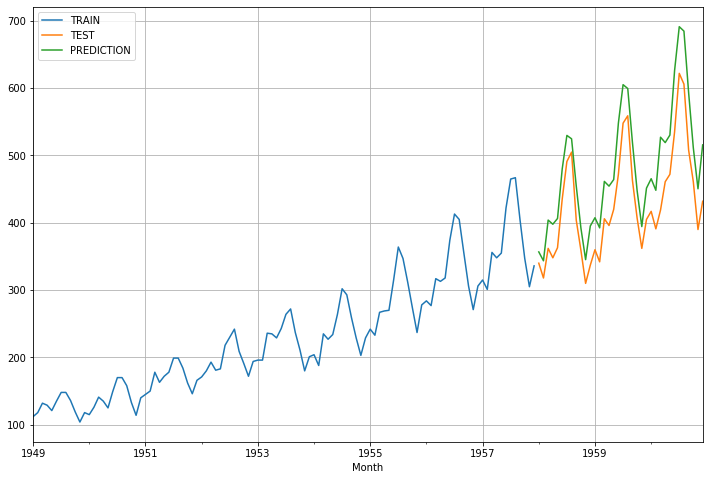

In [12]:
# We will now plot the train and test data first and then will add predictions on top of it
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))

test_predictions.plot(legend=True, label='PREDICTION', grid=True)

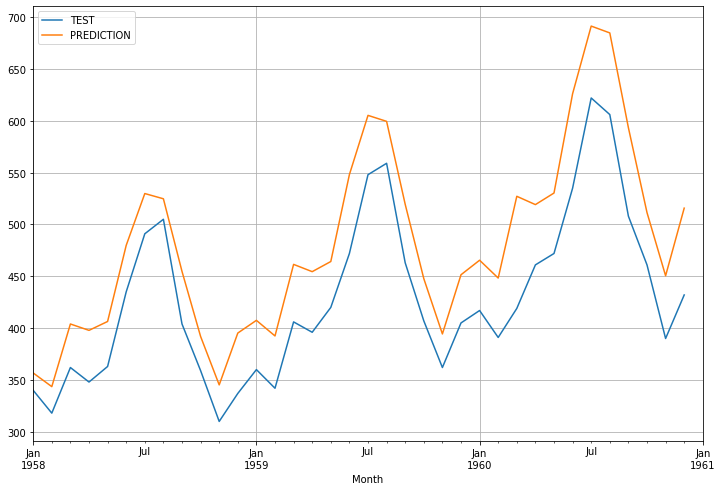

In [13]:
# We would just revisit the years from 1958 onwards

test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', grid=True, figsize=(12, 8), xlim=['1958-01-01', '1961-01-01'])

## Evaluation Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"Mean Absolute Error - {mean_absolute_error(test_data, test_predictions)}")
print(f"Mean Squared Error - {mean_squared_error(test_data, test_predictions)}")
print(f"Root Mean Square Error - {np.sqrt(mean_squared_error(test_data, test_predictions))}")

Mean Absolute Error - 53.163265674782
Mean Squared Error - 3200.5396503496227
Root Mean Square Error - 56.57331217411283


## Forecasting into future

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


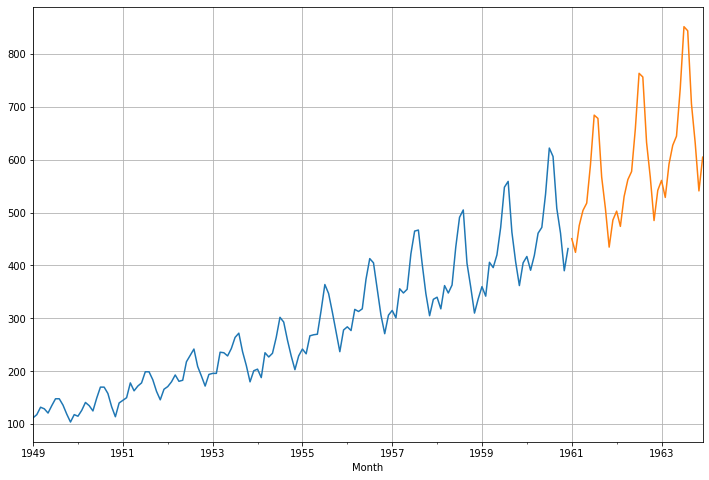

In [16]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

forecast_predictions = final_model.forecast(36)

# We will visualize the forecast as well
df['Thousands of Passengers'].plot(figsize=(12, 8))
forecast_predictions.plot(grid=True)